**Load dataset**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

derm = np.loadtxt("./dermatology2.csv", delimiter=",") #Required deleting the '?' values
print(derm.shape)

# store feature matrix in "X"
X = derm[:,0:33]

# store response vector in "y"
y = derm[:,34]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

dct = tree.DecisionTreeClassifier(random_state=3)
scores = cross_val_score(dct, X, y, cv=10, scoring='accuracy')
print(scores)

(358, 35)
(286, 33) (286,)
(72, 33) (72,)
[0.88888889 0.77777778 0.94444444 0.97222222 0.86111111 0.94444444
 0.97222222 0.97222222 1.         0.91428571]


**4 step model**

In [2]:
# define the parameter values that should be searched
#depth_range = list(range(1, 10))
max_leaf_range = list(range(2, 20))
#min_leaf_range = list(range(1, 5))

# create a parameter grid: map the parameter names to the values that should be searched
#param_grid = dict(max_depth=depth_range, max_leaf_nodes=max_leaf_range, min_samples_leaf=min_leaf_range)
param_grid = dict(max_leaf_nodes=max_leaf_range)

In [3]:
# instantiate and fit the grid
grid = GridSearchCV(dct, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=3, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13

In [4]:
###### view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.958128078817734
{'max_leaf_nodes': 8}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')


**Plot impact**

In [5]:
# plot the results
grid_mean_scores = grid.cv_results_['mean_test_score'] # array of mean scores only
#print (grid_mean_scores)

Text(0, 0.5, 'Cross-Validated Accuracy')

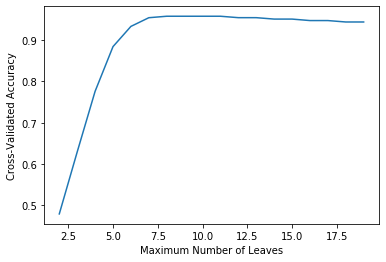

In [6]:
# plot the results
grid_mean_scores = grid.cv_results_['mean_test_score'] # array of mean scores only


plt.plot(max_leaf_range, grid_mean_scores)
plt.xlabel('Maximum Number of Leaves')
plt.ylabel('Cross-Validated Accuracy')

In [79]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

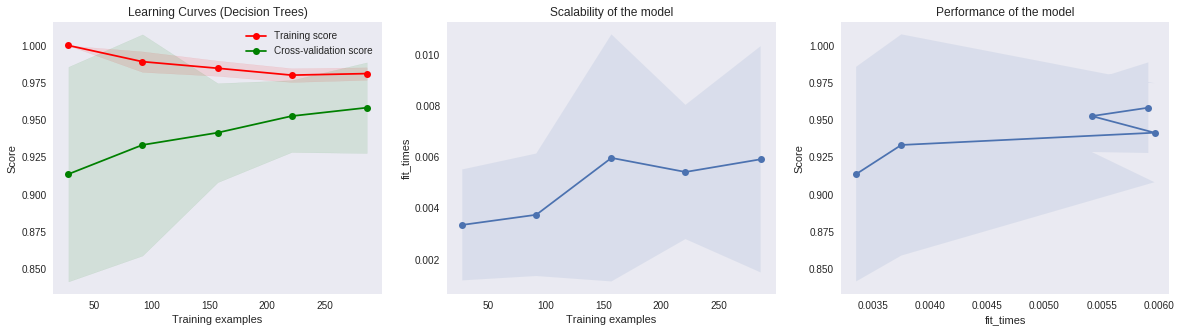

In [82]:
from sklearn.model_selection import learning_curve

title = "Learning Curves (Decision Trees)"
dct_learn = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')
plot_learning_curve(dct_learn, title, X, y, cv=5)

plt.show()

[Text(267.84000000000003, 203.85, 'X[19] <= 0.5\ngini = 0.803\nsamples = 286\nvalue = [85, 47, 55, 40, 42, 17]'),
 Text(234.36, 176.67000000000002, 'X[5] <= 0.5\ngini = 0.785\nsamples = 203\nvalue = [3, 47, 55, 40, 42, 16]'),
 Text(200.88000000000002, 149.49, 'X[14] <= 0.5\ngini = 0.737\nsamples = 149\nvalue = [3, 47, 1, 40, 42, 16]'),
 Text(167.40000000000003, 122.31, 'X[4] <= 0.5\ngini = 0.644\nsamples = 107\nvalue = [3, 47, 1, 40, 0, 16]'),
 Text(133.92000000000002, 95.13, 'X[6] <= 1.5\ngini = 0.541\nsamples = 73\nvalue = [3, 46, 0, 8, 0, 16]'),
 Text(100.44000000000001, 67.94999999999999, 'X[25] <= 0.5\ngini = 0.349\nsamples = 58\nvalue = [3, 46, 0, 8, 0, 1]'),
 Text(66.96000000000001, 40.77000000000001, 'X[21] <= 1.5\ngini = 0.212\nsamples = 52\nvalue = [3, 46, 0, 2, 0, 1]'),
 Text(33.480000000000004, 13.590000000000003, 'gini = 0.117\nsamples = 49\nvalue = [0, 46, 0, 2, 0, 1]'),
 Text(100.44000000000001, 13.590000000000003, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0]'),


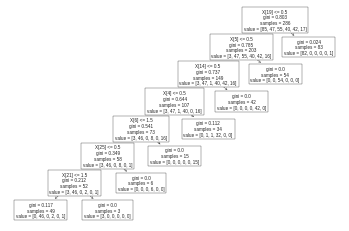

In [83]:
from sklearn import tree

dct = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

dct = dct.fit(X_train, y_train)


tree.plot_tree(dct)

**PREDICT**

In [84]:
# store the predicted response values
y_pred = dct.predict(X_test)
print(len(y_pred))

# compute classification accuracy for the logistic regression model
print(metrics.accuracy_score(y_test, y_pred))

72
0.9444444444444444
